In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import missingno as missno
import datetime

In [2]:
# an instance of RcParams where the figure is sized to 10 x 10
rcParams['figure.figsize'] = 10, 10 
# set seaborn themes to darkgrid
sns.set_style('darkgrid')

In [3]:
# read from csv and create a dataframe
# view the first 5 lines
df1 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
df2 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
df3 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
df4 = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df5 = pd.read_csv('resale-flat-prices-based-on-approval-date-1990-1999.csv')

# concatenate two dataframes into one
df=pd.concat([df1,df2,df3,df4,df5])

In [4]:
# sort according to month 
cdf=df.sort_values('month',ascending=False)

In [5]:
# reset index
cdf = cdf.reset_index(drop=True)
cdf

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2021-05,BEDOK,EXECUTIVE,633,BEDOK RESERVOIR RD,10 TO 12,144.0,Apartment,1993,70 years 11 months,750000.0
1,2021-05,JURONG WEST,5 ROOM,658B,JURONG WEST ST 65,04 TO 06,112.0,Improved,2001,79 years 01 month,485000.0
2,2021-05,CHOA CHU KANG,5 ROOM,135,TECK WHYE LANE,04 TO 06,122.0,Improved,1989,67 years,485000.0
3,2021-05,CHOA CHU KANG,5 ROOM,205,CHOA CHU KANG CTRL,01 TO 03,122.0,Improved,1989,67 years,480000.0
4,2021-05,CHOA CHU KANG,5 ROOM,485,CHOA CHU KANG AVE 5,13 TO 15,116.0,Improved,1999,77 years 02 months,470000.0
...,...,...,...,...,...,...,...,...,...,...,...
843452,1990-01,KALLANG/WHAMPOA,3 ROOM,49,DORSET RD,04 TO 06,68.0,NEW GENERATION,1979,NaN,52000.0
843453,1990-01,KALLANG/WHAMPOA,3 ROOM,46,OWEN RD,01 TO 03,68.0,NEW GENERATION,1982,NaN,58000.0
843454,1990-01,KALLANG/WHAMPOA,3 ROOM,14,KG ARANG RD,04 TO 06,103.0,NEW GENERATION,1984,NaN,77000.0
843455,1990-01,KALLANG/WHAMPOA,3 ROOM,20,ST. GEORGE'S RD,04 TO 06,67.0,NEW GENERATION,1984,NaN,66500.0


In [6]:
# dataframe attributes
print(cdf.columns)
print('---------------')
print(cdf.shape)
print('---------------')
print(cdf.size)
print('---------------')
print(cdf.index)
print('---------------')
print(cdf.values)
print('---------------')

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')
---------------
(843457, 11)
---------------
9278027
---------------
RangeIndex(start=0, stop=843457, step=1)
---------------
[['2021-05' 'BEDOK' 'EXECUTIVE' ... 1993 '70 years 11 months' 750000.0]
 ['2021-05' 'JURONG WEST' '5 ROOM' ... 2001 '79 years 01 month' 485000.0]
 ['2021-05' 'CHOA CHU KANG' '5 ROOM' ... 1989 '67 years' 485000.0]
 ...
 ['1990-01' 'KALLANG/WHAMPOA' '3 ROOM' ... 1984 nan 77000.0]
 ['1990-01' 'KALLANG/WHAMPOA' '3 ROOM' ... 1984 nan 66500.0]
 ['1990-01' 'YISHUN' '5 ROOM' ... 1985 nan 100000.0]]
---------------


### Preliminary Cleaning

In [7]:
# obtain summary of the dataframe
print(cdf.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843457 entries, 0 to 843456
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                843457 non-null  object 
 1   town                 843457 non-null  object 
 2   flat_type            843457 non-null  object 
 3   block                843457 non-null  object 
 4   street_name          843457 non-null  object 
 5   storey_range         843457 non-null  object 
 6   floor_area_sqm       843457 non-null  float64
 7   flat_model           843457 non-null  object 
 8   lease_commence_date  843457 non-null  int64  
 9   remaining_lease      134403 non-null  object 
 10  resale_price         843457 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 70.8+ MB
None


In [8]:
# check whether the columns have any missing values
print(cdf.isnull().any())
print('---------------')
# obtain list of columns with missing values
print(cdf.columns[cdf.isnull().any()])

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
remaining_lease         True
resale_price           False
dtype: bool
---------------
Index(['remaining_lease'], dtype='object')


In [9]:
# obtain no of missing values per column
print(cdf.isnull().sum())
print('---------------')
# obtain total no of missing values by column
print(cdf.isnull().sum().sum())

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
remaining_lease        709054
resale_price                0
dtype: int64
---------------
709054


In [10]:
# check whether the rows have any missing values
print(cdf.isnull().any(axis=1))
print('---------------')
# obtain list of rows with missing values
print(cdf.index[cdf.isnull().any(axis=1)])

0         False
1         False
2         False
3         False
4         False
          ...  
843452     True
843453     True
843454     True
843455     True
843456     True
Length: 843457, dtype: bool
---------------
Int64Index([134403, 134404, 134405, 134406, 134407, 134408, 134409, 134410,
            134411, 134412,
            ...
            843447, 843448, 843449, 843450, 843451, 843452, 843453, 843454,
            843455, 843456],
           dtype='int64', length=709054)


In [11]:
# obtain no of missing values per row
print(cdf.isnull().sum(axis=1))
print('---------------')
# obtain total no of missing values by row
print(cdf.isnull().sum(axis=1).sum())

0         0
1         0
2         0
3         0
4         0
         ..
843452    1
843453    1
843454    1
843455    1
843456    1
Length: 843457, dtype: int64
---------------
709054


In [12]:
# show all records info that has missing data
cdf[cdf.isnull().any(axis=1)]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
134403,2014-12,CLEMENTI,4 ROOM,333,CLEMENTI AVE 2,04 TO 06,92.0,New Generation,1978,NaN,580000.0
134404,2014-12,CLEMENTI,4 ROOM,373,CLEMENTI AVE 4,04 TO 06,91.0,New Generation,1981,NaN,485000.0
134405,2014-12,CLEMENTI,4 ROOM,410,C'WEALTH AVE WEST,01 TO 03,97.0,New Generation,1978,NaN,527000.0
134406,2014-12,CLEMENTI,4 ROOM,333,CLEMENTI AVE 2,01 TO 03,92.0,New Generation,1978,NaN,550000.0
134407,2014-12,CLEMENTI,4 ROOM,457,CLEMENTI AVE 3,22 TO 24,90.0,Model A,2002,NaN,710000.0
...,...,...,...,...,...,...,...,...,...,...,...
843452,1990-01,KALLANG/WHAMPOA,3 ROOM,49,DORSET RD,04 TO 06,68.0,NEW GENERATION,1979,NaN,52000.0
843453,1990-01,KALLANG/WHAMPOA,3 ROOM,46,OWEN RD,01 TO 03,68.0,NEW GENERATION,1982,NaN,58000.0
843454,1990-01,KALLANG/WHAMPOA,3 ROOM,14,KG ARANG RD,04 TO 06,103.0,NEW GENERATION,1984,NaN,77000.0
843455,1990-01,KALLANG/WHAMPOA,3 ROOM,20,ST. GEORGE'S RD,04 TO 06,67.0,NEW GENERATION,1984,NaN,66500.0


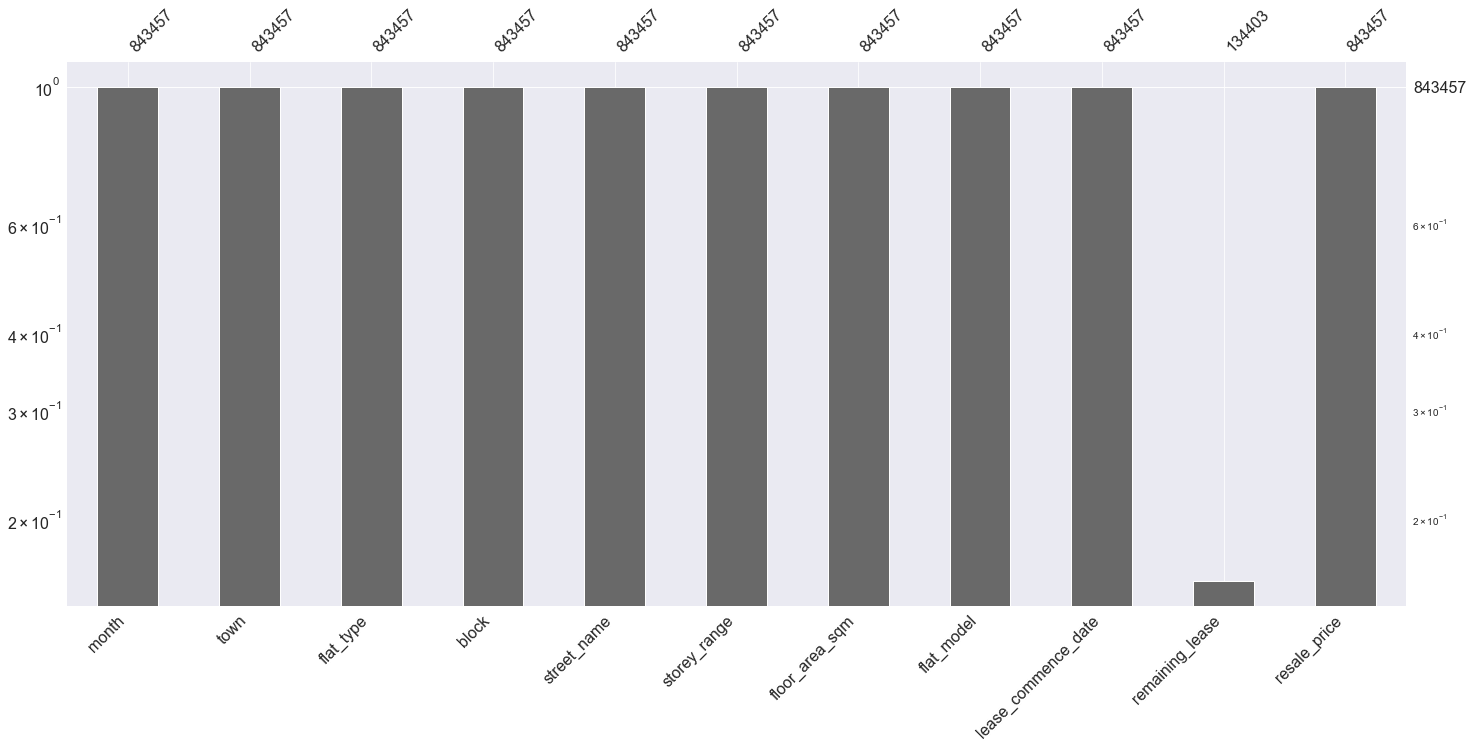

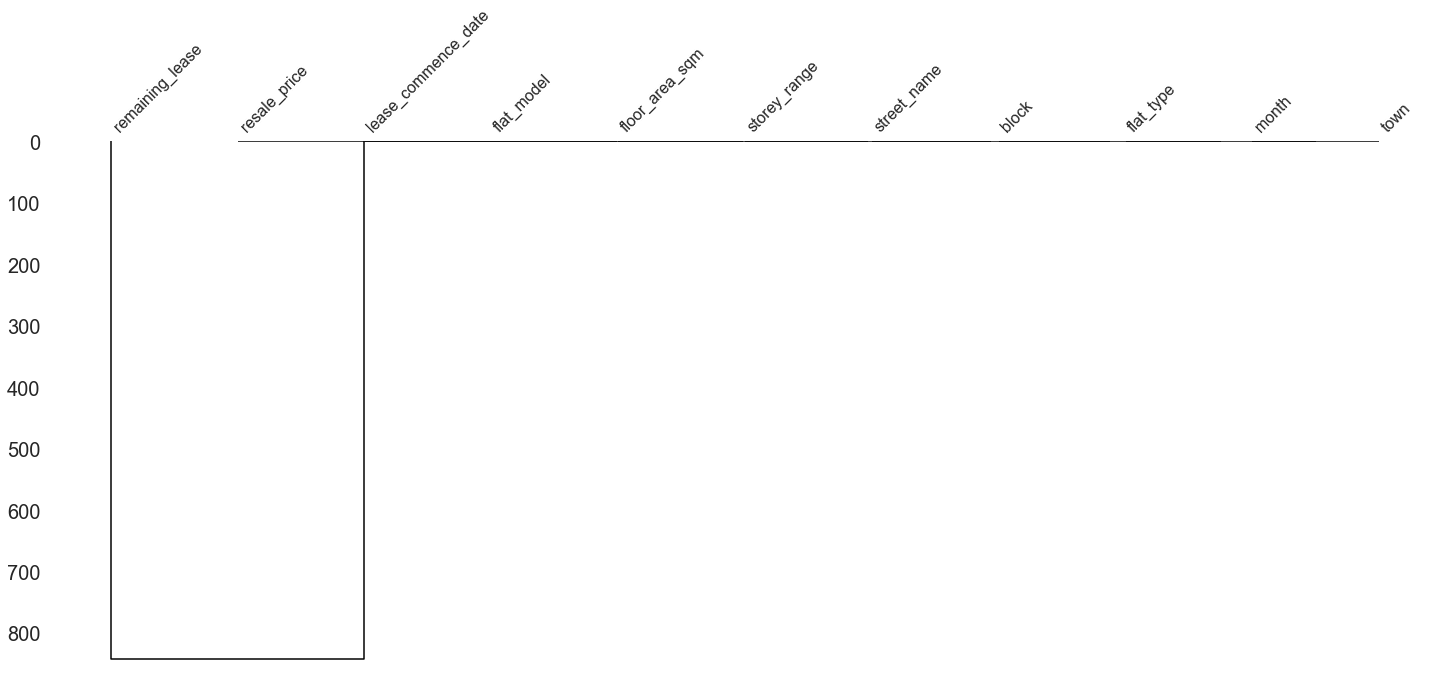

In [13]:
# plot missing values as a bar:
missno.bar(cdf, log=True) 
# plot missing values as a heatmap:
# missno.heatmap(cdf) 
# plot missing values as a dendrogram:
missno.dendrogram(cdf) 

### Data Cleaning and Data Exploration

In [14]:
# find duplicated rows # will not drop the duplicated rows since they are assumed to be unique
cdf.loc[cdf.duplicated(keep=False),:]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
230,2021-04,HOUGANG,3 ROOM,473B,UPP SERANGOON CRES,04 TO 06,68.0,Model A,2017,95 years 02 months,360000.0
232,2021-04,HOUGANG,3 ROOM,473B,UPP SERANGOON CRES,04 TO 06,68.0,Model A,2017,95 years 02 months,360000.0
1992,2021-04,PUNGGOL,5 ROOM,663B,PUNGGOL DR,16 TO 18,110.0,Improved,2016,94 years 03 months,650000.0
2014,2021-04,PUNGGOL,4 ROOM,308A,PUNGGOL WALK,01 TO 03,92.0,Premium Apartment,2016,94 years,500000.0
2018,2021-04,PUNGGOL,4 ROOM,308A,PUNGGOL WALK,01 TO 03,92.0,Premium Apartment,2016,94 years,500000.0
...,...,...,...,...,...,...,...,...,...,...,...
843354,1990-01,QUEENSTOWN,3 ROOM,2,GHIM MOH RD,10 TO 12,65.0,IMPROVED,1976,NaN,40000.0
843355,1990-01,QUEENSTOWN,3 ROOM,2,GHIM MOH RD,10 TO 12,65.0,IMPROVED,1976,NaN,40000.0
843356,1990-01,QUEENSTOWN,3 ROOM,2,GHIM MOH RD,04 TO 06,65.0,IMPROVED,1976,NaN,36000.0
843366,1990-01,JURONG WEST,EXECUTIVE,407,JURONG WEST ST 42,10 TO 12,150.0,MAISONETTE,1985,NaN,160000.0


In [15]:
# convert a string where first letter is uppercase and all remaining letters are lowercase
cdf['town']=cdf['town'].str.title()
cdf['flat_type']=cdf['flat_type'].str.title()
cdf['street_name']=cdf['street_name'].str.title()
cdf['storey_range']=cdf['storey_range'].str.title()
cdf['flat_model']=cdf['flat_model'].str.title()
cdf.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2021-05,Bedok,Executive,633,Bedok Reservoir Rd,10 To 12,144.0,Apartment,1993,70 years 11 months,750000.0
1,2021-05,Jurong West,5 Room,658B,Jurong West St 65,04 To 06,112.0,Improved,2001,79 years 01 month,485000.0
2,2021-05,Choa Chu Kang,5 Room,135,Teck Whye Lane,04 To 06,122.0,Improved,1989,67 years,485000.0
3,2021-05,Choa Chu Kang,5 Room,205,Choa Chu Kang Ctrl,01 To 03,122.0,Improved,1989,67 years,480000.0
4,2021-05,Choa Chu Kang,5 Room,485,Choa Chu Kang Ave 5,13 To 15,116.0,Improved,1999,77 years 02 months,470000.0


In [16]:
# change name of columns
cdf.rename(columns= {'month':'date'}, inplace=True)
cdf.head()

,date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2021-05,Bedok,Executive,633,Bedok Reservoir Rd,10 To 12,144.0,Apartment,1993,70 years 11 months,750000.0
1,2021-05,Jurong West,5 Room,658B,Jurong West St 65,04 To 06,112.0,Improved,2001,79 years 01 month,485000.0
2,2021-05,Choa Chu Kang,5 Room,135,Teck Whye Lane,04 To 06,122.0,Improved,1989,67 years,485000.0
3,2021-05,Choa Chu Kang,5 Room,205,Choa Chu Kang Ctrl,01 To 03,122.0,Improved,1989,67 years,480000.0
4,2021-05,Choa Chu Kang,5 Room,485,Choa Chu Kang Ave 5,13 To 15,116.0,Improved,1999,77 years 02 months,470000.0


In [17]:
# datatypes
cdf.dtypes

date                    object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

In [18]:
# convert month to datetime
cdf['date']=pd.to_datetime(cdf.date)

In [19]:
# datatypes
cdf.dtypes

date                   datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
remaining_lease                object
resale_price                  float64
dtype: object

In [20]:
# create new columns year and month
cdf['year']=cdf.date.dt.year
cdf['month']=cdf.date.dt.month
cdf.head()

,date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month
0,2021-05-01,Bedok,Executive,633,Bedok Reservoir Rd,10 To 12,144.0,Apartment,1993,70 years 11 months,750000.0,2021,5
1,2021-05-01,Jurong West,5 Room,658B,Jurong West St 65,04 To 06,112.0,Improved,2001,79 years 01 month,485000.0,2021,5
2,2021-05-01,Choa Chu Kang,5 Room,135,Teck Whye Lane,04 To 06,122.0,Improved,1989,67 years,485000.0,2021,5
3,2021-05-01,Choa Chu Kang,5 Room,205,Choa Chu Kang Ctrl,01 To 03,122.0,Improved,1989,67 years,480000.0,2021,5
4,2021-05-01,Choa Chu Kang,5 Room,485,Choa Chu Kang Ave 5,13 To 15,116.0,Improved,1999,77 years 02 months,470000.0,2021,5


In [21]:
# drop column remaining lease
cdf.drop(columns=['remaining_lease'], inplace=True) 
cdf.head()

,date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,month
0,2021-05-01,Bedok,Executive,633,Bedok Reservoir Rd,10 To 12,144.0,Apartment,1993,750000.0,2021,5
1,2021-05-01,Jurong West,5 Room,658B,Jurong West St 65,04 To 06,112.0,Improved,2001,485000.0,2021,5
2,2021-05-01,Choa Chu Kang,5 Room,135,Teck Whye Lane,04 To 06,122.0,Improved,1989,485000.0,2021,5
3,2021-05-01,Choa Chu Kang,5 Room,205,Choa Chu Kang Ctrl,01 To 03,122.0,Improved,1989,480000.0,2021,5
4,2021-05-01,Choa Chu Kang,5 Room,485,Choa Chu Kang Ave 5,13 To 15,116.0,Improved,1999,470000.0,2021,5


In [22]:
# add new column for lease tenure 
# create new columns for remaining lease
# formula: remaining_lease = lease_commence_date + 99 – current_year
cdf['lease_tenure'] = 99
cdf['current_year'] = 2021
cdf['remaining_lease'] = cdf['lease_commence_date'] + cdf['lease_tenure'] - cdf['current_year']
cdf.head()

,date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,month,lease_tenure,current_year,remaining_lease
0,2021-05-01,Bedok,Executive,633,Bedok Reservoir Rd,10 To 12,144.0,Apartment,1993,750000.0,2021,5,99,2021,71
1,2021-05-01,Jurong West,5 Room,658B,Jurong West St 65,04 To 06,112.0,Improved,2001,485000.0,2021,5,99,2021,79
2,2021-05-01,Choa Chu Kang,5 Room,135,Teck Whye Lane,04 To 06,122.0,Improved,1989,485000.0,2021,5,99,2021,67
3,2021-05-01,Choa Chu Kang,5 Room,205,Choa Chu Kang Ctrl,01 To 03,122.0,Improved,1989,480000.0,2021,5,99,2021,67
4,2021-05-01,Choa Chu Kang,5 Room,485,Choa Chu Kang Ave 5,13 To 15,116.0,Improved,1999,470000.0,2021,5,99,2021,77


### Relationship between number of transactions and year 

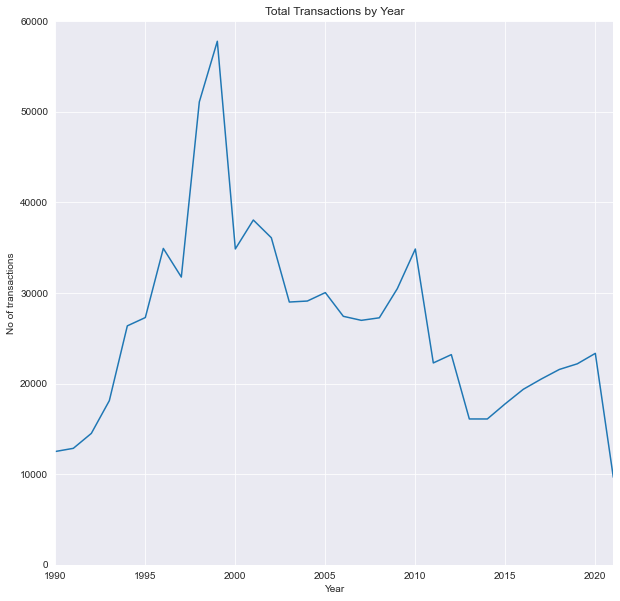

In [23]:
# plot a linechart based on year
cdf.year.value_counts().sort_index().plot()
# title
plt.title("Total Transactions by Year")
plt.xlim(1990,2021) 
plt.ylim(0,60000)
plt.xlabel('Year')
plt.ylabel('No of transactions')
plt.show()

### Relationship between number of transactions and lease commencement date

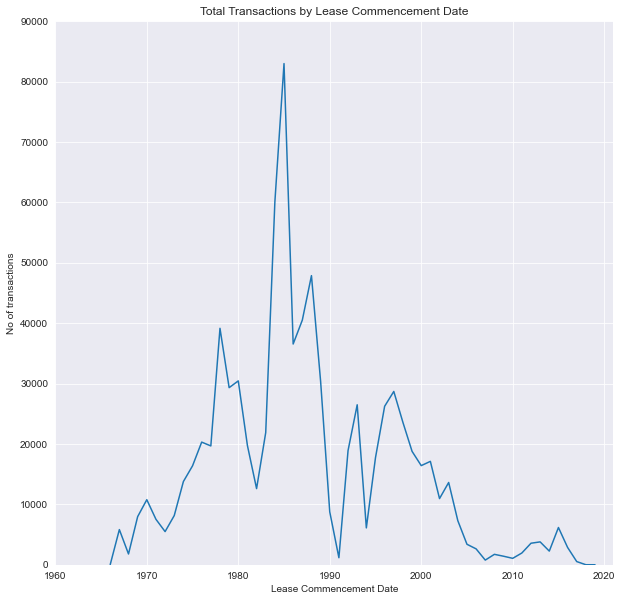

In [24]:
# plot a linechart based on lease commencement date
cdf.lease_commence_date.value_counts().sort_index().plot()
# title
plt.title("Total Transactions by Lease Commencement Date")
plt.xlim(1960,2021) 
plt.ylim(0,90000)
plt.xlabel('Lease Commencement Date')
plt.ylabel('No of transactions')
plt.show()

### Relationship between number of transactions and remaining lease

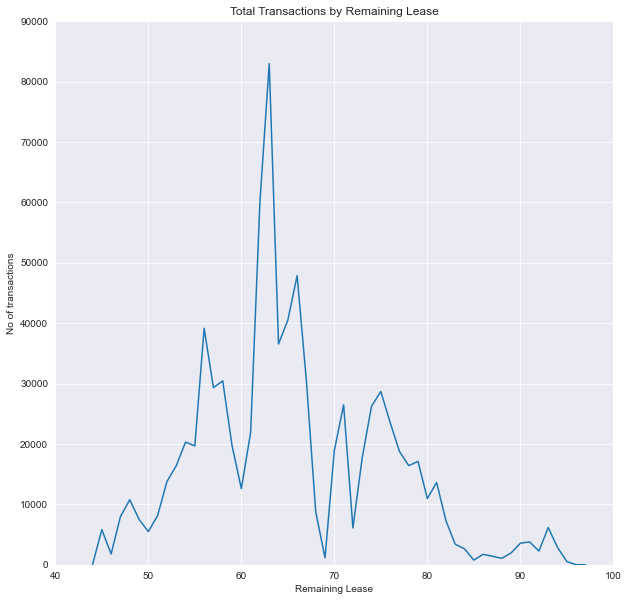

In [25]:
# plot a linechart based on remaining lease 
cdf.remaining_lease.value_counts().sort_index().plot()
# title
plt.title("Total Transactions by Remaining Lease")
plt.xlim(40, 100) 
plt.ylim(0,90000)
plt.xlabel('Remaining Lease')
plt.ylabel('No of transactions')
plt.show()

### Descriptive Statistics of Resale Price 

In [26]:
# generate descriptive statistics based on resale price
cdf['resale_price'].describe()

count    8.434570e+05
mean     2.974198e+05
std      1.514288e+05
min      5.000000e+03
25%      1.830000e+05
50%      2.780000e+05
75%      3.880000e+05
max      1.258000e+06
Name: resale_price, dtype: float64

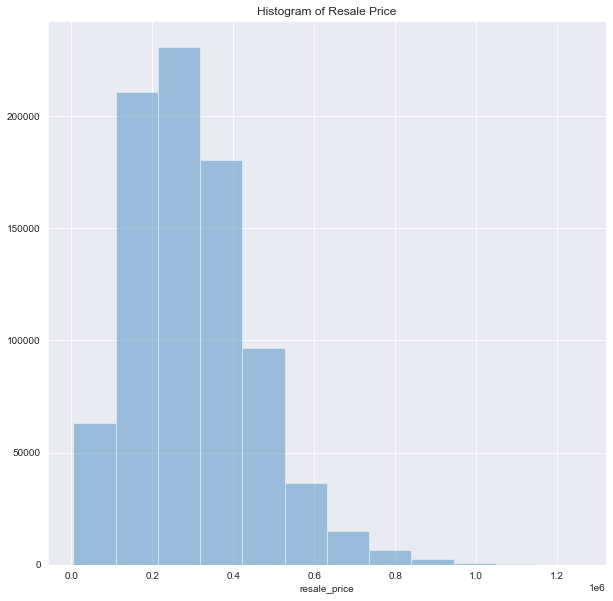

In [27]:
# plot a histogram based on resale price
sns.distplot(cdf['resale_price'], bins=12, kde=False).set_title('Histogram of Resale Price');

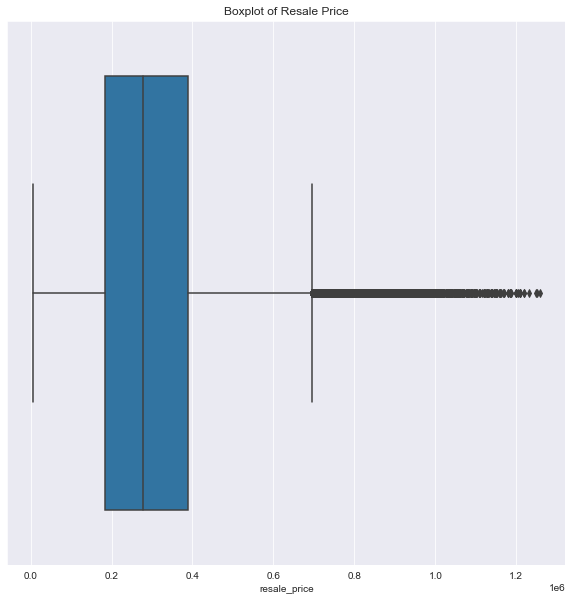

In [28]:
# plot a boxplot based on resale price
sns.boxplot(cdf['resale_price']).set_title('Boxplot of Resale Price');

### Relationship between resale price and year

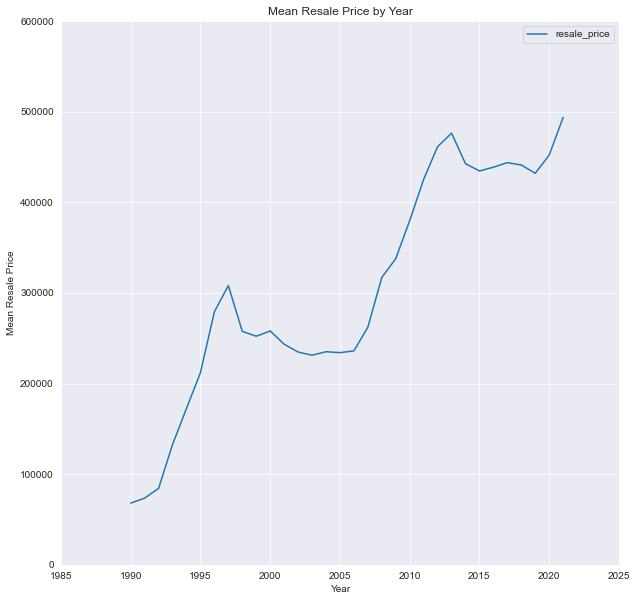

In [29]:
# plot a linechart based on year
cdf.groupby('year').mean()[['resale_price']].sort_index().plot()
# title
plt.title("Mean Resale Price by Year")
plt.xlim(1985,2025) 
plt.ylim(0,600000)
plt.xlabel('Year')
plt.ylabel('Mean Resale Price')
plt.show()

### Descriptive Statistics of Floor Area Sqm

In [30]:
# generate descriptive statistics based on floor area sqm
cdf['floor_area_sqm'].describe()

count    843457.000000
mean         95.616896
std          26.019523
min          28.000000
25%          73.000000
50%          93.000000
75%         114.000000
max         307.000000
Name: floor_area_sqm, dtype: float64

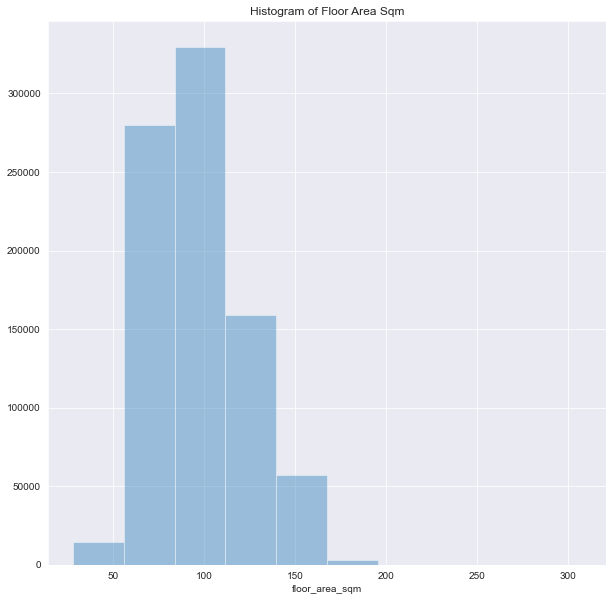

In [31]:
# plot a histogram based on floor area sqm
sns.distplot(cdf['floor_area_sqm'], bins=10, kde=False).set_title('Histogram of Floor Area Sqm');

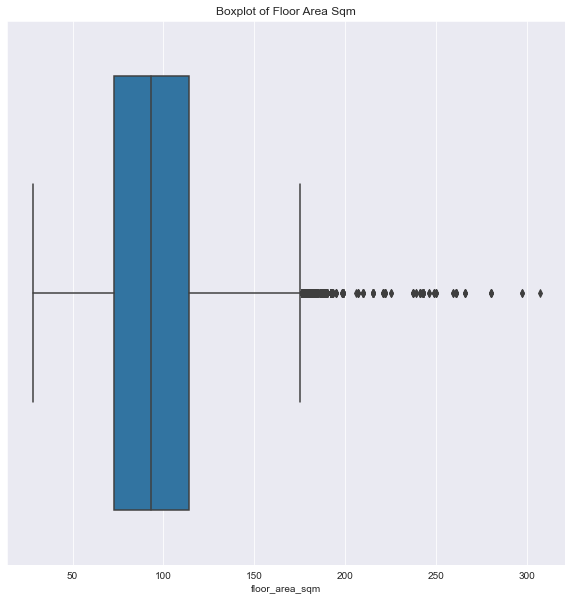

In [32]:
# plot a boxplot based on floor area sqm
sns.boxplot(cdf['floor_area_sqm']).set_title('Boxplot of Floor Area Sqm');

### Flat Type

In [33]:
# obtain unique values
cdf['flat_type'].unique()

array(['Executive', '5 Room', '4 Room', '3 Room', '2 Room', '1 Room',
       'Multi-Generation', 'Multi Generation'], dtype=object)

In [34]:
# replace text for consistency
new_cdf = cdf.replace({'Multi Generation': 'Multi-Generation'}) 
cdf=new_cdf

In [35]:
# obtain unique values
cdf['flat_type'].unique()

array(['Executive', '5 Room', '4 Room', '3 Room', '2 Room', '1 Room',
       'Multi-Generation'], dtype=object)

In [36]:
# obtain and display value_counts in alphabetical order
cdf['flat_type'].value_counts().sort_index(ascending=True)

1 Room                1281
2 Room               10098
3 Room              276203
4 Room              316390
5 Room              174949
Executive            64023
Multi-Generation       513
Name: flat_type, dtype: int64

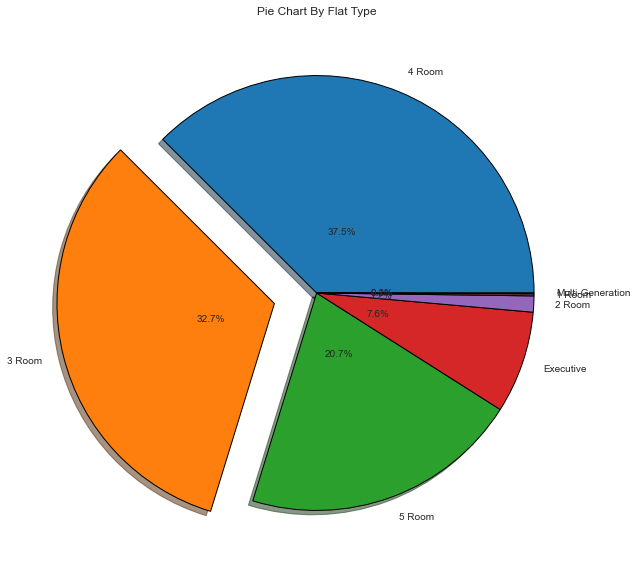

In [37]:
# count the frequency
frequency = cdf['flat_type'].value_counts()
# label the piechart
names = list(frequency.index)
# plot a piechart
plt.pie(frequency, labels=names, explode=(0,0.2,0,0,0,0,0), shadow=True, autopct='%1.1f%%', pctdistance=0.3, wedgeprops={'edgecolor':'black'})
#title
plt.title("Pie Chart By Flat Type")
plt.show()

### Descriptive statistics of flat type based on resale price 

In [38]:
# group according to flat type
# generate descriptive statistics based on resale price
cdf.groupby('flat_type').resale_price.describe()

,count,mean,std,min,25%,50%,75%,max
flat_type,,,,,,,,
1 Room,1281.0,63774.852459,57188.937857,5000.0,32000.0,47000.0,66000.0,260000.0
2 Room,10098.0,131861.830759,83312.052293,12000.0,70000.0,105000.0,210000.0,510000.0
3 Room,276203.0,188653.787142,94671.821555,16600.0,132500.0,167000.0,246000.0,1185000.0
4 Room,316390.0,301213.867546,120916.457077,32500.0,222000.0,273000.0,370000.0,1186888.0
5 Room,174949.0,403410.342731,133968.503142,60000.0,315000.0,385000.0,468000.0,1258000.0
Executive,64023.0,487358.077202,130706.677740,110000.0,401000.0,475000.0,565000.0,1210000.0
Multi-Generation,513.0,509597.497076,169770.328699,140000.0,399000.0,487000.0,610000.0,990000.0


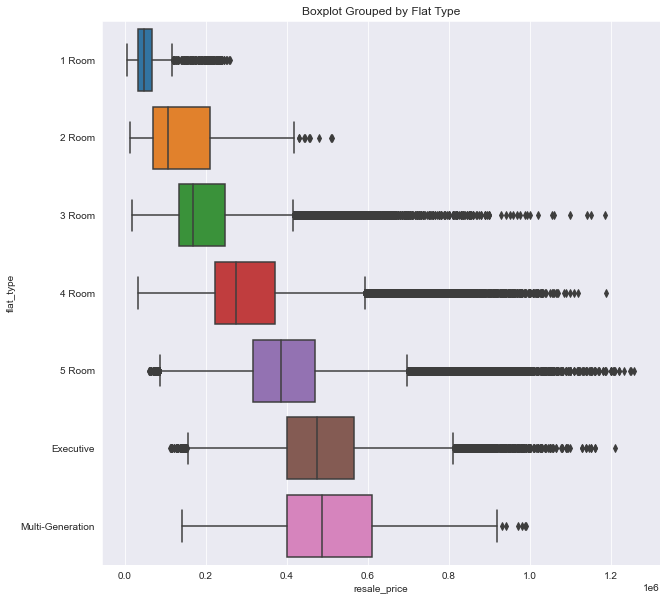

In [39]:
# plot boxplots by flat type
new_order = ["1 Room", "2 Room", "3 Room", "4 Room", "5 Room", "Executive", "Multi-Generation"]
sns.boxplot(x='resale_price', y='flat_type', data=cdf, order=new_order).set_title('Boxplot Grouped by Flat Type');

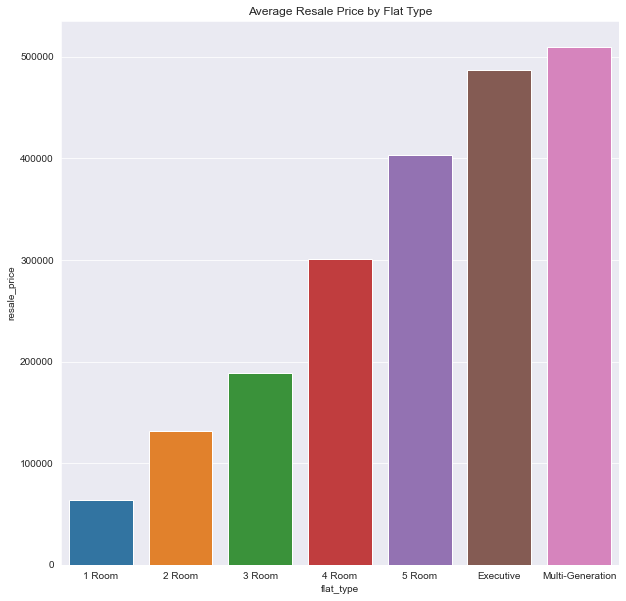

In [40]:
# plot a bar graph according to flat type based on resale price
new_order = ["1 Room", "2 Room", "3 Room", "4 Room", "5 Room", "Executive", "Multi-Generation"]
sns.barplot(x='flat_type', y='resale_price', ci=None, data=cdf, order=new_order)
# title
plt.title("Average Resale Price by Flat Type")
plt.show()

### Flat Model

In [41]:
# obtain unique values
cdf['flat_model'].unique()

array(['Apartment', 'Improved', 'Model A', 'Type S2', 'Type S1',
       'Premium Apartment', 'Model A-Maisonette', 'Standard',
       'New Generation', 'Dbss', 'Simplified', 'Maisonette', 'Model A2',
       'Terrace', 'Adjoined Flat', 'Multi-Generation',
       'Premium Apartment Loft', '2-Room', 'Improved-Maisonette',
       'Premium Maisonette'], dtype=object)

In [42]:
# obtain and display value_counts in alphabetical order
cdf['flat_model'].value_counts().sort_index(ascending=True)

2-Room                        43
Adjoined Flat               1118
Apartment                  32692
Dbss                        2031
Improved                  221631
Improved-Maisonette          116
Maisonette                 27455
Model A                   233952
Model A-Maisonette          1927
Model A2                    9251
Multi-Generation             513
New Generation            179492
Premium Apartment          37108
Premium Apartment Loft        61
Premium Maisonette            83
Simplified                 54538
Standard                   40341
Terrace                      654
Type S1                      299
Type S2                      152
Name: flat_model, dtype: int64

### Descriptive statistics of flat model based on resale price

In [43]:
# group according to flat model
# generate descriptive statistics based on resale price
cdf.groupby('flat_model').resale_price.describe()

,count,mean,std,min,25%,50%,75%,max
flat_model,,,,,,,,
2-Room,43.0,1.440326e+05,79419.653082,14000.0,88000.0,135000.0,223500.0,275000.0
Adjoined Flat,1118.0,4.730072e+05,194722.033629,95888.0,330000.0,430000.0,620000.0,1088000.0
Apartment,32692.0,4.886236e+05,115518.987249,114000.0,410000.0,473000.0,558000.0,1160000.0
Dbss,2031.0,7.479217e+05,155459.306039,300000.0,640000.0,745000.0,850444.0,1250000.0
Improved,221631.0,3.096964e+05,154381.686648,5000.0,184000.0,308000.0,403000.0,1200000.0
Improved-Maisonette,116.0,4.319980e+05,169815.783014,120000.0,338750.0,402150.0,542500.0,750000.0
Maisonette,27455.0,4.822356e+05,149152.028362,110000.0,385000.0,468000.0,575000.0,1210000.0
Model A,233952.0,3.039353e+05,125822.599378,35000.0,220000.0,282000.0,375000.0,1050000.0
Model A-Maisonette,1927.0,4.344005e+05,173432.079203,90700.0,330000.0,408000.0,515000.0,1008888.0


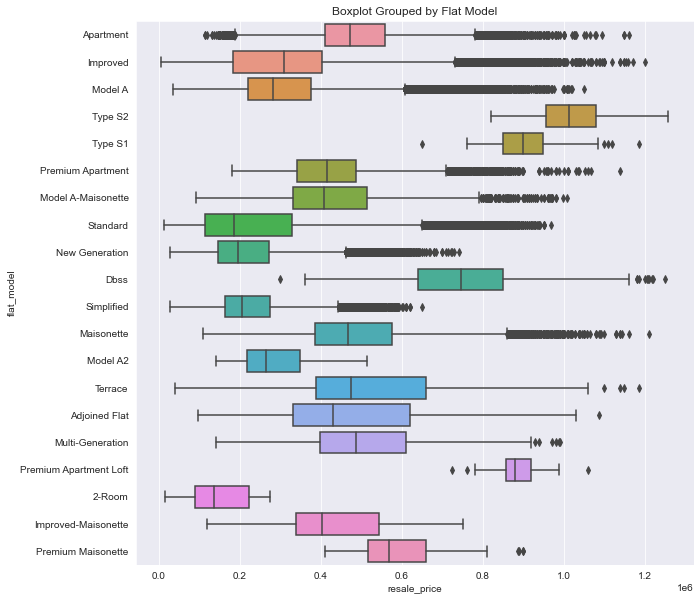

In [44]:
# plot boxplots by flat model
sns.boxplot(x='resale_price', y='flat_model', data=cdf).set_title('Boxplot Grouped by Flat Model');

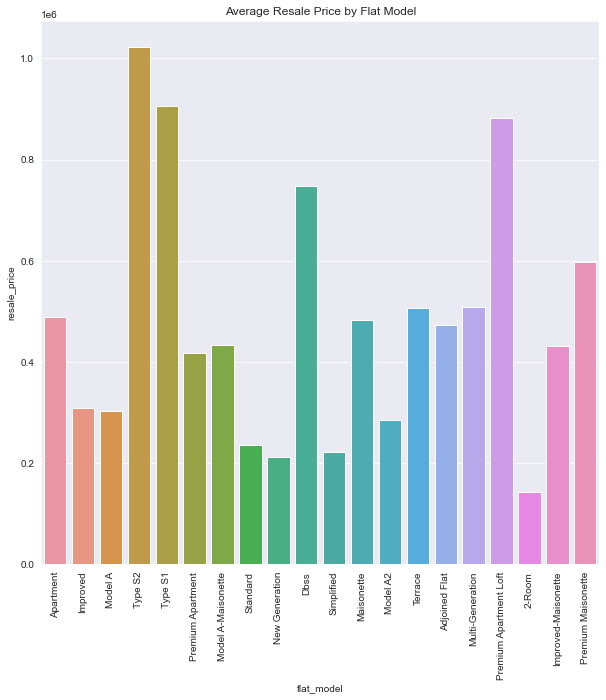

In [45]:
# plot a bar graph according to flat model based on resale price
sns.barplot(x='flat_model', y='resale_price', ci=None, data=cdf)
# title
plt.title("Average Resale Price by Flat Model")
# rotate the x axis ticks by 90 degrees
plt.xticks(rotation=90)
plt.show()

### Town

In [46]:
# obtain unique values
cdf['town'].unique()

array(['Bedok', 'Jurong West', 'Choa Chu Kang', 'Central Area',
       'Bukit Timah', 'Bukit Panjang', 'Bukit Merah', 'Clementi',
       'Geylang', 'Hougang', 'Jurong East', 'Ang Mo Kio', 'Bukit Batok',
       'Bishan', 'Sengkang', 'Tampines', 'Serangoon', 'Toa Payoh',
       'Woodlands', 'Yishun', 'Punggol', 'Pasir Ris', 'Marine Parade',
       'Kallang/Whampoa', 'Queenstown', 'Sembawang', 'Lim Chu Kang'],
      dtype=object)

In [47]:
# obtain and display value_counts in alphabetical order
cdf['town'].value_counts().sort_index(ascending=True)

Ang Mo Kio         48904
Bedok              62351
Bishan             19923
Bukit Batok        40870
Bukit Merah        31184
Bukit Panjang      24952
Bukit Timah         2334
Central Area        6492
Choa Chu Kang      34114
Clementi           26189
Geylang            26137
Hougang            46352
Jurong East        23217
Jurong West        61627
Kallang/Whampoa    24499
Lim Chu Kang          64
Marine Parade       7500
Pasir Ris          30855
Punggol            13908
Queenstown         26477
Sembawang          11264
Sengkang           25525
Serangoon          21445
Tampines           74364
Toa Payoh          29056
Woodlands          59597
Yishun             64257
Name: town, dtype: int64

### Descriptive statistics of town based on resale price

In [48]:
# group according to town
# generate descriptive statistics based on resale price
cdf.groupby('town').resale_price.describe()

,count,mean,std,min,25%,50%,75%,max
town,,,,,,,,
Ang Mo Kio,48904.0,241494.955534,142251.276861,5600.0,150000.0,210000.0,315000.0,1030000.0
Bedok,62351.0,260272.620852,141675.616728,13500.0,157000.0,232000.0,340000.0,935000.0
Bishan,19923.0,401525.412454,177951.863650,29000.0,277500.0,383000.0,505000.0,1250000.0
Bukit Batok,40870.0,257376.940060,132547.845400,25000.0,155000.0,238000.0,335000.0,938000.0
Bukit Merah,31184.0,323379.499023,212918.973425,5000.0,156000.0,278000.0,447000.0,1200000.0
Bukit Panjang,24952.0,311961.294893,127691.642819,41000.0,213725.0,297000.0,396000.0,840000.0
Bukit Timah,2334.0,428628.989717,210188.104869,35000.0,290000.0,401000.0,538000.0,1210000.0
Central Area,6492.0,307297.686057,228711.536487,18500.0,161000.0,237000.0,400000.0,1258000.0
Choa Chu Kang,34114.0,325749.476275,102729.597094,30000.0,251000.0,322000.0,390000.0,900000.0


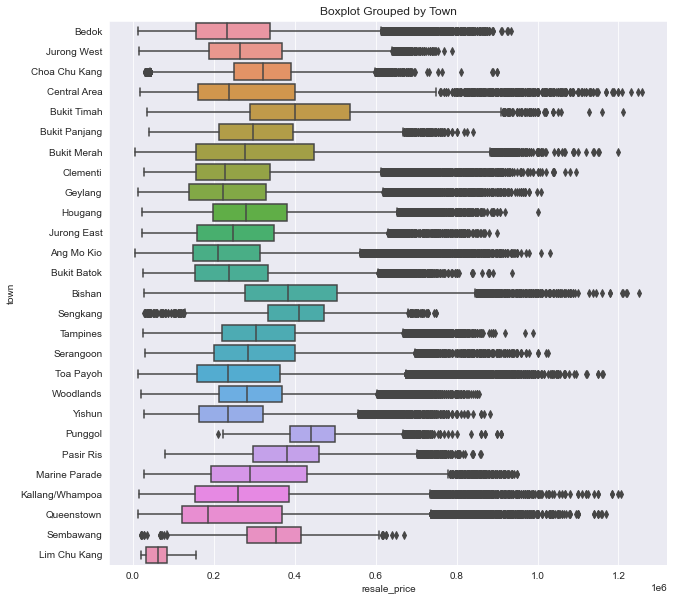

In [49]:
# plot boxplots by town
sns.boxplot(x='resale_price', y='town', data=cdf).set_title('Boxplot Grouped by Town');

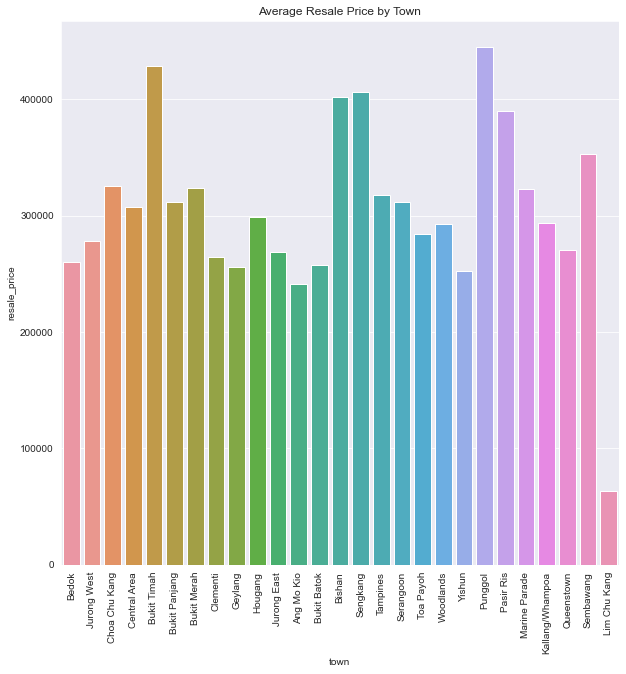

In [50]:
# plot a bar graph according to town based on resale price
sns.barplot(x='town', y='resale_price', ci=None, data=cdf)
# title
plt.title("Average Resale Price by Town")
# rotate the x axis ticks by 90 degrees
plt.xticks(rotation=90)
plt.show()

### Storey Range

In [51]:
# obtain unique values
cdf['storey_range'].unique()

array(['10 To 12', '04 To 06', '01 To 03', '13 To 15', '07 To 09',
       '34 To 36', '25 To 27', '19 To 21', '16 To 18', '28 To 30',
       '31 To 33', '22 To 24', '37 To 39', '49 To 51', '40 To 42',
       '43 To 45', '46 To 48', '01 To 05', '11 To 15', '06 To 10',
       '21 To 25', '16 To 20', '26 To 30', '36 To 40', '31 To 35'],
      dtype=object)

In [52]:
# obtain and display value_counts in alphabetical order
cdf['storey_range'].value_counts().sort_index(ascending=True)

01 To 03    171964
01 To 05      2700
04 To 06    213583
06 To 10      2474
07 To 09    192563
10 To 12    163270
11 To 15      1259
13 To 15     53868
16 To 18     20268
16 To 20       265
19 To 21      9777
21 To 25        92
22 To 24      6322
25 To 27      2694
26 To 30        39
28 To 30      1138
31 To 33       329
31 To 35         2
34 To 36       320
36 To 40         7
37 To 39       304
40 To 42       151
43 To 45        28
46 To 48        29
49 To 51        11
Name: storey_range, dtype: int64

In [53]:
# replace storey range for consistency
new_cdf = cdf.replace({
    '01 To 03': 'Low', 
    '01 To 05': 'Low',
    '04 To 06': 'Low',
    '06 To 10': 'Low',
    '07 To 09': 'Low',
    '10 To 12': 'Low',
    '11 To 15': 'Low',
    '13 To 15': 'Low',
    '16 To 18': 'Mid',
    '16 To 20': 'Mid',
    '19 To 21': 'Mid',
    '21 To 25': 'Mid',
    '22 To 24': 'Mid',
    '25 To 27': 'Mid',
    '26 To 30': 'Mid',
    '28 To 30': 'Mid',
    '31 To 33': 'High',
    '31 To 35': 'High',
    '34 To 36': 'High',
    '36 To 40': 'High',
    '37 To 39': 'High',
    '40 To 42': 'High',
    '43 To 45': 'High',
    '46 To 48': 'High',
    '49 To 51': 'High'    
}) 
cdf=new_cdf

In [54]:
# obtain value_counts
cdf['storey_range'].value_counts()

Low     801681
Mid      40595
High      1181
Name: storey_range, dtype: int64

### Descriptive statistics of storey range based on resale price

In [55]:
# group according to storey range
# generate descriptive statistics based on resale price
cdf.groupby('storey_range').resale_price.describe()

,count,mean,std,min,25%,50%,75%,max
storey_range,,,,,,,,
High,1181.0,819637.453853,173907.421757,325000.0,720000.0,828000.0,945000.0,1258000.0
Low,801681.0,289845.414307,144211.983441,5000.0,180000.0,272888.0,380000.0,1210000.0
Mid,40595.0,431808.503485,194235.059730,15300.0,304000.0,418000.0,540000.0,1220000.0


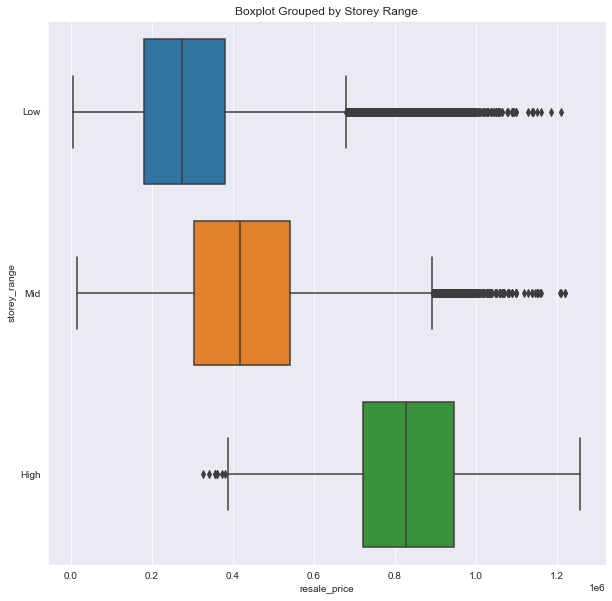

In [56]:
# plot boxplots by storey range
new_order = ["Low", "Mid", "High"]
sns.boxplot(x='resale_price', y='storey_range', data=cdf, order=new_order).set_title('Boxplot Grouped by Storey Range');

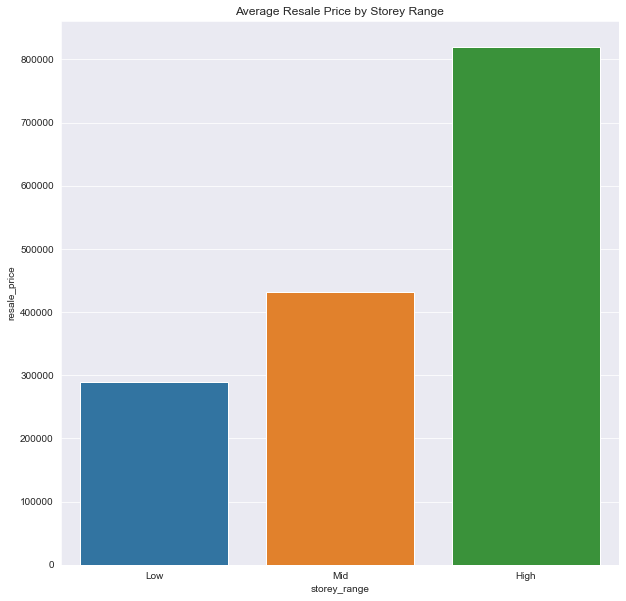

In [57]:
# plot a bar graph according to storey range based on resale price
new_order = ["Low", "Mid", "High"]
sns.barplot(x='storey_range', y='resale_price', ci=None, data=cdf, order=new_order)
# title
plt.title("Average Resale Price by Storey Range")
plt.show()

### Correlation

In [58]:
# datatypes
cdf.dtypes

date                   datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
year                            int64
month                           int64
lease_tenure                    int64
current_year                    int64
remaining_lease                 int64
dtype: object

In [59]:
# drop columms for lease_tenure and current_year
# cdf['lease_tenure'] = 99
# cdf['current_year'] = 2021
# construct a correlation matrix
correlation=cdf.drop(columns=['lease_tenure', 'current_year']) 
corr=correlation.corr()
corr

,floor_area_sqm,lease_commence_date,resale_price,year,month,remaining_lease
floor_area_sqm,1.000000,0.451304,0.617631,0.072830,0.002554,0.451304
lease_commence_date,0.451304,1.000000,0.506367,0.386289,0.006349,1.000000
resale_price,0.617631,0.506367,1.000000,0.614551,0.011263,0.506367
year,0.072830,0.386289,0.614551,1.000000,-0.022965,0.386289
month,0.002554,0.006349,0.011263,-0.022965,1.000000,0.006349
remaining_lease,0.451304,1.000000,0.506367,0.386289,0.006349,1.000000


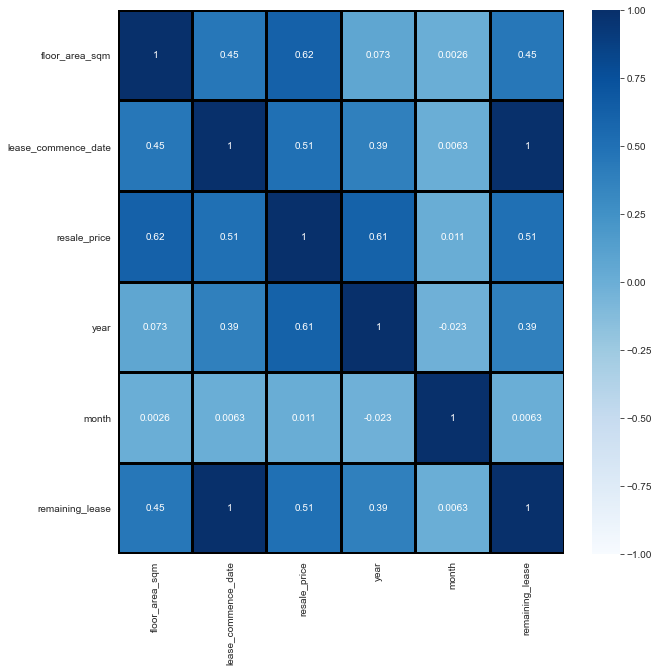

In [60]:
# plot a heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, vmin=-1, vmax=1, center=0, cmap='Blues',linewidths=2, linecolor='black')
plt.show()

### Relationship between resale price and floor area sqm 

### Trend Line

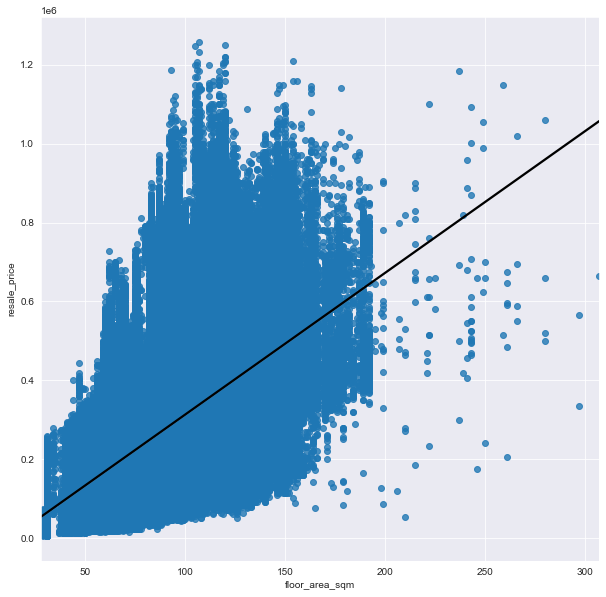

In [61]:
# plot a scatterplot with trend line
sns.regplot(x='floor_area_sqm', y='resale_price', data=cdf, line_kws={'color':'black'})
plt.show()

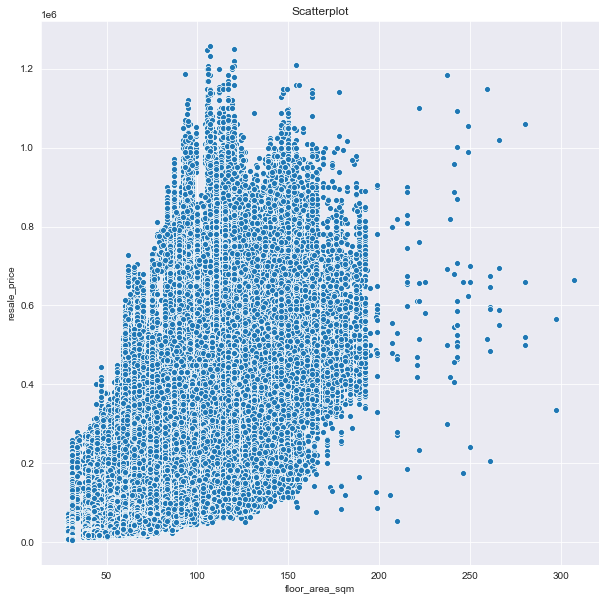

In [62]:
# plot a scatterplot
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=cdf)
# title
plt.title("Scatterplot")
plt.show()

### Cluster 

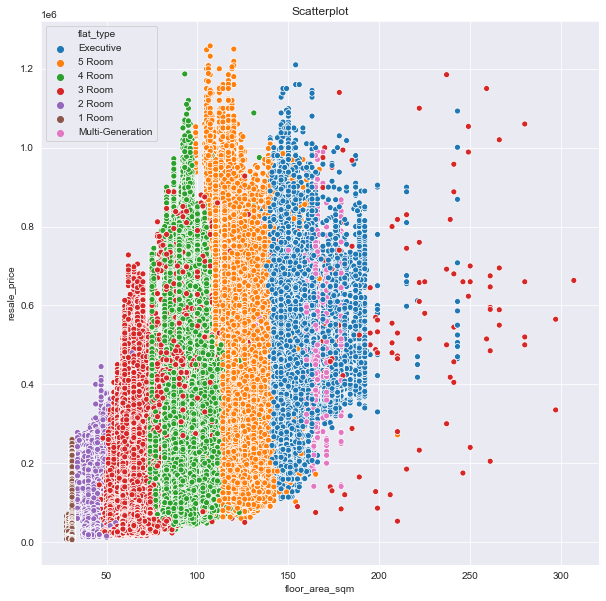

In [63]:
# plot a scatterplot
sns.scatterplot(x='floor_area_sqm', y='resale_price', hue='flat_type', data=cdf)
# title
plt.title("Scatterplot")
plt.show()

C:\Users\jason\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


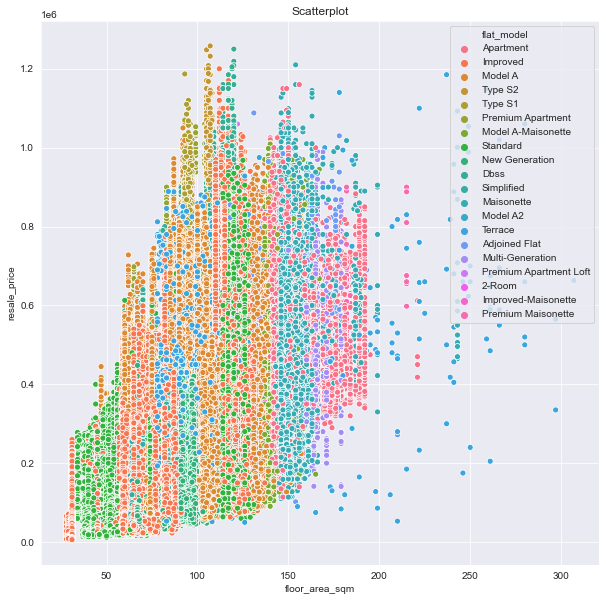

In [64]:
# plot a scatterplot
sns.scatterplot(x='floor_area_sqm', y='resale_price', hue='flat_model', data=cdf)
# title
plt.title("Scatterplot")
plt.show()

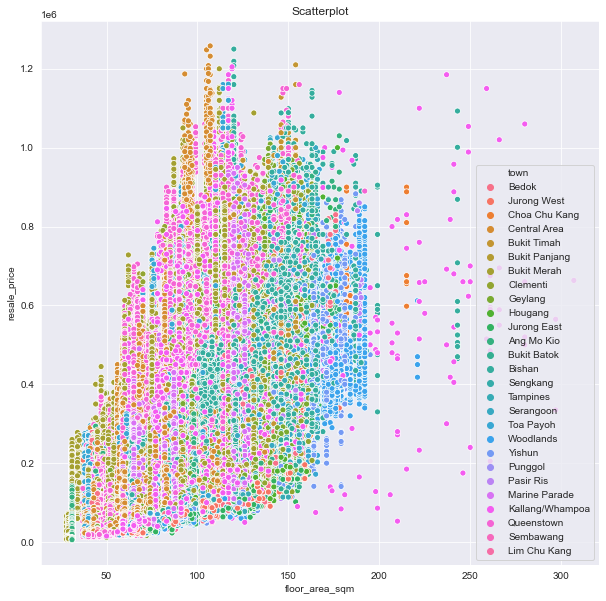

In [65]:
# plot a scatterplot
sns.scatterplot(x='floor_area_sqm', y='resale_price', hue='town', data=cdf)
# title
plt.title("Scatterplot")
plt.show()

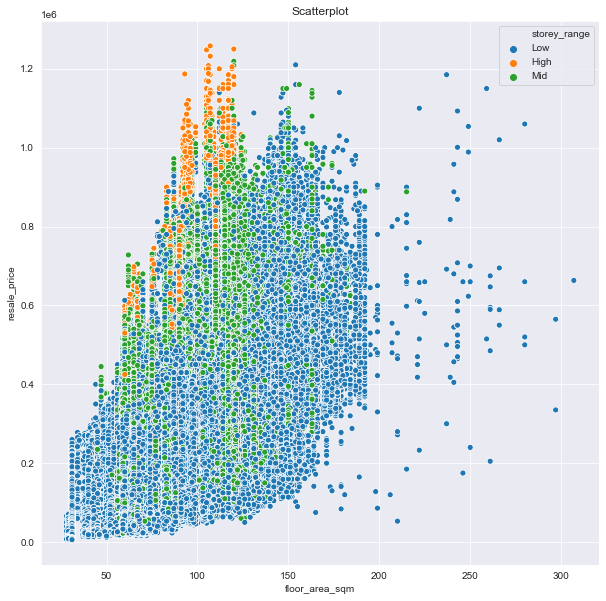

In [66]:
# plot a scatterplot
sns.scatterplot(x='floor_area_sqm', y='resale_price', hue='storey_range', data=cdf)
# title
plt.title("Scatterplot")
plt.show()